In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.rc('ps', useafm=True)
plt.rc('pdf', use14corefonts=True)

In [2]:
table = pd.read_csv('speed_cdf_stats_select_final.csv', index_col=0)
table

,num_samples,min_speed,s1,s2,max_speed,s1_cumfrac,s2_cumfrac,r_squared,s2_s1_cumfrac_diff
wayid,,,,,,,,,
640073514,11524.0,0.6,13.8,30.1,63.7,0.2206,0.9709,0.999,0.7503
673365543,113.0,9.6,14.8,22.6,31.2,0.1504,0.9009,0.998,0.7505
267252124,1251.0,6.6,36.4,55.7,79.9,0.2045,0.9551,0.999,0.7506
25850274,1259.0,2.5,12.8,21.3,59.1,0.1620,0.9139,0.997,0.7519
24027794,16426.0,1.6,28.1,45.8,71.5,0.2338,0.9860,0.998,0.7522
...,...,...,...,...,...,...,...,...,...
311725584,15363.0,2.2,10.4,35.4,62.7,0.0043,0.9893,0.997,0.9850
698498913,16476.0,8.0,15.5,57.2,81.1,0.0012,0.9866,0.997,0.9854
4962801,17353.0,8.4,20.0,56.8,77.5,0.0082,0.9962,0.996,0.9880


In [3]:
table.sort_values('r_squared')

,num_samples,min_speed,s1,s2,max_speed,s1_cumfrac,s2_cumfrac,r_squared,s2_s1_cumfrac_diff
wayid,,,,,,,,,
680094834,5262.0,2.0,8.1,18.6,59.1,0.0148,0.8740,0.983,0.8592
231504513,3471.0,2.4,8.0,21.5,72.9,0.0024,0.8923,0.989,0.8899
678331193,54.0,5.0,7.6,16.9,47.7,0.0439,0.8697,0.990,0.8258
427264567,14709.0,2.3,6.8,33.5,55.9,0.0077,0.9648,0.990,0.9571
427264577,14394.0,3.5,17.4,40.9,56.8,0.0268,0.9979,0.990,0.9711
...,...,...,...,...,...,...,...,...,...
4741921,7810.0,0.7,14.9,30.9,55.8,0.0637,0.9806,1.000,0.9169
39885368,14860.0,4.7,31.6,51.2,73.8,0.0607,0.9747,1.000,0.9140
561480209,15662.0,5.6,16.0,41.0,55.7,0.0451,0.9857,1.000,0.9406


In [5]:
cluster_labels = pd.read_csv('../clustering/cluster_labels_k3_rand0.csv', index_col=0)
cluster0 = cluster_labels.index[cluster_labels.cluster_label == 0]
cluster1 = cluster_labels.index[cluster_labels.cluster_label == 1]
cluster2 = cluster_labels.index[cluster_labels.cluster_label == 2]

In [6]:
table_all = table
table_cluster0 = table.loc[cluster0.intersection(table.index)]
table_cluster1 = table.loc[cluster1.intersection(table.index)]
table_cluster2 = table.loc[cluster2.intersection(table.index)]

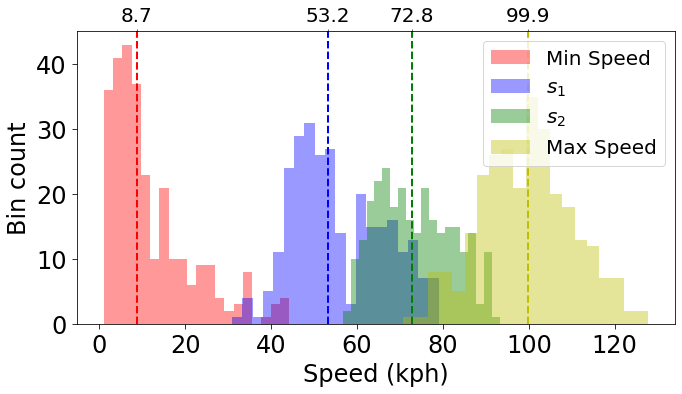

In [9]:
#table = table_all
#suffix = ''

#table = table_cluster0
#suffix = '-cluster0'

#table = table_cluster1
#suffix = '-cluster1'

table = table_cluster2
suffix = '-cluster2'

plt.rc('font', size=24)
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)
nbins = 20
ret = table.min_speed.hist(ax=ax, bins=nbins, color='r', alpha=0.4, label='Min Speed')
table.s1.hist(ax=ax, bins=nbins, color='b', alpha=0.4, label=r'$s_1$')
table.s2.hist(ax=ax, bins=nbins, color='g', alpha=0.4, label=r'$s_2$')
table.max_speed.hist(ax=ax, bins=nbins, color='y', alpha=0.4, label='Max Speed')
means = table[['min_speed', 's1', 's2', 'max_speed']].median()
ymin, ymax = ax.get_ylim()
ax.vlines(means.values, ymin, ymax, color=['r', 'b', 'g', 'y'], linestyles='--', linewidth=2)
ax.set_ylim(ymin, ymax)
ax.set_xticks(means, ['{:.1f}'.format(v) for v in means], minor=True)
ax.tick_params(which='minor', axis='x', bottom=0, top=1, labelbottom=0, labeltop=1, labelsize='small')
ax.tick_params(which='major', length=5, pad=5)
ax.set_xlabel('Speed (kph)', labelpad=5)
ax.set_ylabel('Bin count', labelpad=5)
ax.grid(False)
ax.legend(loc=0, fontsize='small', fancybox=True)
fig.tight_layout()
fig.savefig('../figures/speed-plot-dist{}.pdf'.format(suffix))
plt.show()